In [2]:
import pandas as pd

monthly_report = pd.read_csv('monthly_report.csv')
print(monthly_report)

               timestamp purchase                       item
0    2020-01-17 17:23:06        y  cue cards - love actually
1    2020-01-25 17:09:39        n                        NaN
2    2020-01-25 05:22:01        n                        NaN
3    2020-01-18 04:33:40        y      t-rex - jurassic park
4    2020-01-24 17:24:52        n                        NaN
..                   ...      ...                        ...
495  2020-01-16 08:40:02        n                        NaN
496  2020-01-09 21:11:19        n                        NaN
497  2020-01-31 08:54:51        n                        NaN
498  2020-01-21 19:35:03        n                        NaN
499  2020-01-31 09:48:43        n                        NaN

[500 rows x 3 columns]


In [4]:
import numpy as np

#calculate and print sample_size:
sample_size = len(monthly_report)
print(sample_size)
#calculate and print num_purchased:
num_purchased = np.sum(monthly_report.purchase == 'y')
print(num_purchased)

500
41


In [5]:
flip = np.random.choice(['heads', 'tails'], size=10, p=[0.5, 0.5])
print(flip)
## simulate 10 flips

['heads' 'heads' 'heads' 'tails' 'heads' 'heads' 'heads' 'tails' 'tails'
 'heads']


In [28]:
#simulate one visitor:
one_visitor = np.random.choice(['y', 'n'], size=1, p=[0.1, 0.9])
print(one_visitor)
#simulate 500 visitors:
simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
# print(simulated_monthly_visitors)

['y']


In [30]:
#simulate 500 visitors:
simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
#calculate the number of simulated visitors who made a purchase:
num_purchased = np.sum(simulated_monthly_visitors == 'y')
print(num_purchased)
print(num_purchased - 50)

57
7


In [32]:
null_outcomes = []
#start for loop here:
for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

#calculate the minimum and maximum values in null_outcomes here:
null_min = np.min(null_outcomes)
print(null_min)
null_max = np.max(null_outcomes)
print(null_max)

27
77


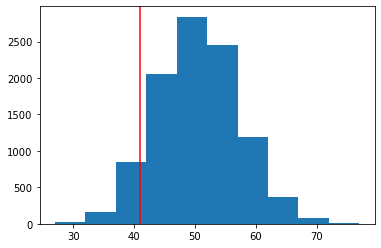

In [37]:
import matplotlib.pyplot as plt
#plot the histogram here:
plt.hist(null_outcomes)
plt.axvline(41, color = 'r')
plt.show()

In [38]:
#calculate the 90% interval here:
null_90CI = np.percentile(null_outcomes, [5, 95])
print(null_90CI)

[39. 61.]


In [40]:
#calculate the p-value here:
null_outcomes = np.array(null_outcomes)
p_value = np.sum(null_outcomes <= 41) / len(null_outcomes)
print(p_value) # one-sided p-value

p_value = np.sum((null_outcomes <= 41) | (null_outcomes >= 59)) / len(null_outcomes)
print(p_value) # two-sided p-value

0.1017
0.2059


In [41]:
import numpy as np
from scipy.stats import binom_test

def simulation_binomial_test(observed_successes, n, p):
    #initialize null_outcomes
    null_outcomes = []

    #generate the simulated null distribution
    for i in range(10000):
        simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1-p])
        num_purchased = np.sum(simulated_monthly_visitors == 'y')
        null_outcomes.append(num_purchased)

    #calculate a 1-sided p-value
    null_outcomes = np.array(null_outcomes)
    p_value = np.sum(null_outcomes <= observed_successes)/len(null_outcomes)

    #return the p-value
    return p_value

#Test your function below by uncommenting the code below. You should see that your simulation function gives you a very similar answer to the binom_test function from scipy:

p_value1 = simulation_binomial_test(45, 500, .1)
print("simulation p-value: ", p_value1)

p_value2 = binom_test(45, 500, .1, alternative = 'less')
print("binom_test p-value: ", p_value2)

simulation p-value:  0.2522
binom_test p-value:  0.254689260562342


In [50]:
from scipy.stats import binom_test
p_value = binom_test(35, n=100, p=0.5)
print(str(p_value * 100) + "%")

0.3517641722970159%


In [51]:
# calculate p_value_2sided here:
p_value_2sided = binom_test(41, 500, .1)
print(p_value_2sided)
# calculate p_value_1sided here:
p_value_1sided = binom_test(41, 500, .1, alternative = 'less')
print(p_value_1sided)

0.2045639770068255
0.10011352697567076
